## Overview 

As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

### 1. Defining the Question

Create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables

#### b) Defining the Metric for Success
The model will be considered a success when it is able to correctly and accurately predict the sale of prices given the dataset. 

I look to using 80% as a good target score for accuracy.

#### c) Understanding the context 

The business would love to predict the house prices to aid its business forecasting and sales in the coming financial years

#### d) Recording the Experimental Design
1. Perform EDA
2. Perform Feature Engineering if necessary
3. Check for multicoliinearity
4. Build the model
5. Perform cross validation
6. Calculate the RMSE
7. Create the residual plots and assess for heteroskedicity
##### Regression Tests to Be Done
- Multiple Linear Regression
- Quantile Regression
- Ridge Regression
- Lasso Regression
- Elastic Net Regression

#### e) Data Relevance

The data was provided by the Moringa Data Science Program Education Department
[http://bit.ly/IndependentProjectWeek7Dataset]. 

#### f) Appropriateness of Data

Tests will be carried out to ensure that the data is approprraite for the study or whether additional data needs to be sourced

### 2. Reading the Data

#### Importing the Libraries




In [2]:
import pandas as pd
import numpy as np

import seaborn as sb
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn import metrics
from sklearn.model_selection import train_test_split

import scipy as sp
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


# Ridge Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Lasso Regression

from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

# Elastic Ridge Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [61]:
X = prices[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]
y = prices['price']

#### Function to Prepare and View Data

In [23]:
def preparation (df):

    # df = pd.read_csv(dataset)
 
    # print(f"\nShape of the Dataset:{df.head(5)}")
    print(f"\n Info of the Dataset:")
    print(f"\n {df.info()}")
    print(f"\n Shape of the Dataset:{df.shape}")
    print(f"\n Description of the Dataset:")
    print(f"\n {df.describe()}")
    
    return df

#### Function to run the Quantile Regression

In [93]:
def quantile (df7):
    ## Creating a linear regression model regression on the above dataset
    #
    from sklearn.linear_model import LinearRegression

    model1 = LinearRegression(fit_intercept = True, normalize = False)
    model1.fit(X, y)

    y_pred1 = model1.predict(X)

    print("Mean squared error: {0:.2f}"
        .format(np.mean((y_pred1 - y) ** 2)))
    print('Variance score: {0:.2f}'.format(model1.score(X, y)))

    # We will use the python package statsmodels for Quantile Regression
    #
    import statsmodels.formula.api as smf

    # Finding the regression coefficients for the conditioned median, 0.5 quantile
    #
    mod = smf.quantreg('y ~ X', df7)
    res = mod.fit(q=.5)

    # Then print out the summary of our model
    #
    print(res.summary())



##### Function to run logistic Regression

In [85]:
def logit (df6):
    sb.heatmap(df6.corr()) 

# Splitting our dataset

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=100)

    # Fitting our model
    LogReg = LogisticRegression()
    LogReg.fit(X_train, y_train)

    # Using our model to make a prediction

    y_pred = LogReg.predict(X_test)


# Evaluating the model
#

    confusion_matric = confusion_matrix(y_test, y_pred)
    print(confusion_matric)


    # Visualizing Confusion Matrix using Heatmap

    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(confusion_matric), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix Plot', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    # Confusion Matrix Evaluation Metrics

    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))

In [4]:
def roc_plot (df7):

    # Splitting our dataset

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=100)

    # Fitting our model
    LogReg = LogisticRegression()
    LogReg.fit(X_train, y_train)

    # Using our model to make a prediction

    y_pred = LogReg.predict(X_test)
# ROC Curve

    y_pred_proba = LogReg.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()

#### Function to Run a Linear Regression

In [5]:
def line_reg(df1):
    # df1 = pd.read_csv(dataset)

    df1.boxplot()
    plt.title("title")
    plt.xticks(rotation=90)
    plt.ylabel('Points')
    plt.show()


    # Plotting to find any relationship between the variables

    df1.plot(x = "Independent Variable", y =  "Dependent Variables", style='o')
    plt.title('Plot for the Indipendent vs Dependent Variables')
    plt.xlabel('Score of the Indipendent Variable Studied')
    plt.ylabel('Dependent Variable Score')
    plt.show()

    # Defining the Columns to be used

    X = df1.iloc[:, :-1].values
    y = df1.iloc[:, 1].values

    # Splitting the data

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Training the Algorithm

    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(X_train, y_train) 

    # Getting the intercept and slope

    print("\nIntercept: ", regressor.intercept_)   
    print("\nRegressor", regressor.coef_)

    # Making Predictions

    y_pred = regressor.predict(X_test)
    df12 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    print(f"\n{df12}")

    # Evaluating the Algorithm
    
    from sklearn import metrics
    print('\nMean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('\nMean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


#### Function to run a Mutiple Linear Regression

In [189]:
def mutiple_line(df6):
    plt.figure(figsize = (10,8))
    plt.title("Correlation Plot")
    sb.heatmap(df6.corr()) 

    # Dividing our data into training and test sets

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training the Algorithm

    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)

    coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
    print(f"{coeff_df}")

    # Making Predictions

    y_pred = regressor.predict(X_test)

    # To compare the actual output values for X_test with the predicted values
    # 
    df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    print(f"\n{df}")

    # Evaluating the Algorithm

    from sklearn import metrics
    print('\nMean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('\nMean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    

#### Functions to check for the Residual plots and heteroskedasticity testing

In [7]:
def residual_check (df2):

    X_train, X_test, admit_train, admit_test = train_test_split(X, y, test_size=0.2, random_state=0)

    regressor = LinearRegression()
    regressor.fit(X_train, admit_train)

    # This is our prediction for admission based on our model
    admit_predict = regressor.predict(X_test)

    # We now create the residual by substracting the test value from the predicted 
    # value for each row in our dataset

    residuals = np.subtract(admit_predict, admit_test)

    # Let's describe our residual:
    pd.DataFrame(residuals).describe()

    print(f"\n residual Mean: {residuals.mean() }")

    plt.scatter(admit_predict, residuals, color='black')
    plt.title("Residual Plot")
    plt.ylabel('residual')
    plt.xlabel('fitted values')
    plt.axhline(y= residuals.mean(), color='red', linewidth=1)
    plt.show()

#### Function to check for heteroskedasticity

In [8]:
def heteroskedasticity(df3):


    X_train, X_test, admit_train, admit_test = train_test_split(X, y, test_size=0.2, random_state=0)
    regressor = LinearRegression()
    regressor.fit(X_train, admit_train)

    admit_predict = regressor.predict(X_test)

    # We now create the residual by substracting the test value from the predicted 
    # value for each row in our dataset

    residuals = np.subtract(admit_predict, admit_test)
    test_result, p_value = sp.stats.bartlett(admit_predict, residuals)

    # To interpret the results we must also compute a critical value of the chi squared distribution
    degree_of_freedom = len(admit_predict)-1
    probability = 1 - p_value

    critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
    print(critical_value)

    # 
    # If the test_result is greater than the critical value, then we reject our null
    # hypothesis. This would mean that there are patterns to the variance of the data

    # Otherwise, we can identify no patterns, and we accept the null hypothesis that 
    # the variance is homogeneous across our data

    if (test_result > critical_value):
      print('\nthe variances are unequal, and the model should be reassessed')
    else:
      print('\nthe variances are homogeneous!')

#### Function to Calculate the R2

In [45]:
def r2(df4):

    r2 = r2_score(X,y)

    print(f"\nr2 score for our model is: {r2_score(X,y)}")

#### Function to Run Ridge Regression

In [127]:
def ridge (df8):
        # Creating our baseline regression model
    # This is a model that has no regularization to it
    # 
    regression = LinearRegression()
    regression.fit(X,y)
    first_model = (mean_squared_error(y_true=y,y_pred=regression.predict(X)))
    print("\nThe MSE for Base Model:", first_model)

        # Creating the Ridge Model
    ridge = Ridge(normalize=True)
    search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)


#### Function to Run the Lasso Regression


In [144]:
def lasso (df9):
        # Standadizing our features
    #

    scaler = StandardScaler()
    # X = scaler.transform(X)
    X_std = scaler.fit_transform(X)
    

        # Creating lasso regression with alpha value
    regr = Lasso(alpha=0.5)

    # Fitting the linear regression
    model = regr.fit(X_std, y)


    # Importing linear models
    # 
    from sklearn import linear_model
    from sklearn.metrics import mean_squared_error

    # Creating lasso object
    # 
    lasso = linear_model.Lasso() 

    # Fitting the models
    # 
    lasso.fit(X, y) 

    # Print scores, MSE, and coefficients
    # 
    print("\nlasso score:", lasso.score(X, y)) 
    print("\nlasso MSE:", mean_squared_error(y, lasso.predict(X))) 
    print("\nlasso coef:", lasso.coef_) 



    # Making necessary imports, split data into training and test sets, and choose a set of parameters 
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import GridSearchCV
    import warnings
    warnings.filterwarnings("ignore")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
    parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

    linear = linear_model.LinearRegression()
    lasso = linear_model.Lasso() 
    gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

    # Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
    gridlasso.fit(X_train, y_train) 
    linear.fit(X_train, y_train) 
    print("\nlasso best parameters:", gridlasso.best_params_) 
    print("\nlasso score:", gridlasso.score(X_test, y_test))
    print("\nlinear score:", linear.score(X_test, y_test)) 
    print("\nlasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
    print("\nlinear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
    print("\nlasso best estimator coef:", gridlasso.best_estimator_.coef_)
    print("\nlinear coef:", linear.coef_)


        # Importing library for visualization
    #
    import matplotlib.pyplot as plt
    coefsLasso = [] 

    # Building Lasso for 200 values of alpha and write the coefficients into array
    # 
    alphasLasso = np.arange (0, 20, 0.1) 
    for i in range(200):
        lasso = linear_model.Lasso(alpha=alphasLasso[i])
        lasso.fit(X_train, y_train)
        coefsLasso.append(lasso.coef_) 

    # Building Lasso coefficient plots
    # 
    plt.figure(figsize = (16,7))

    plt.subplot(121)
    plt.plot(alphasLasso, coefsLasso)
    plt.title('Lasso coefficients')
    plt.xlabel('alpha')
    plt.ylabel('coefs')

    plt.show()


#### 5. Function to Run the Elastic Net Regression

In [181]:
def elastic (df10):
    # Creating our linear regression model for the purpose of comparison
    # 
    regression=LinearRegression()
    regression.fit(X,y)
    first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
    print("\nThe MSE for Base Model:", first_model) 

    coef_dict_baseline = {}
    for coef, feat in zip(regression.coef_,X.columns):
        coef_dict_baseline[feat] = coef
        coef_dict_baseline


    # 
    elastic=ElasticNet(normalize=True)
    search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

    # We will now fit our model and display the best parameters and the best results we can get with that setup.
    # 
    search.fit(X,y)
    search.best_params_
    abs(search.best_score_)

    elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.75)
    elastic.fit(X,y)
    second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
    print("\nThe MSE for the Second Model:",second_model)

    # Below are the coefficients
    # 
    coef_dict_baseline = {}
    for coef, feat in zip(elastic.coef_,X.columns):
        coef_dict_baseline[feat] = coef
    coef_dict_baseline

#### Preparation of the Data


View the Data Types, Shape of Dataset, Outliers, Anomalies, Colinearity Tests, Duplicate Values and Describe the Dataset

In [4]:
# Before reading our dataset, we would like to ensure all columns are visible 
# ---
#  
pd.set_option("display.max.columns", None)

In [3]:
prices = pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')


In [24]:
preparation(prices)


 Info of the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-nu

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


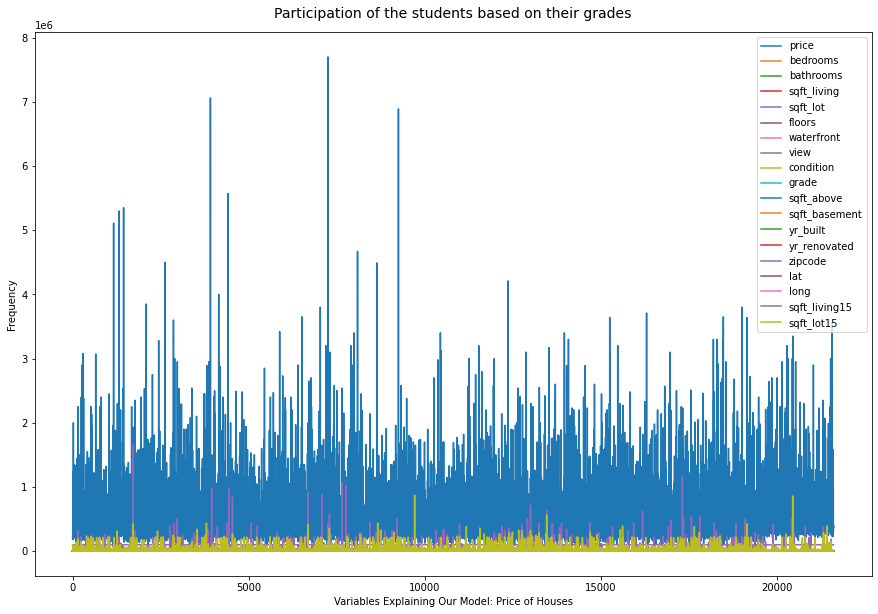

In [8]:
# Plotting our line graph
prices[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']].plot(figsize=(15, 10))

# Giving a title to our line graph
plt.title("Participation of the students based on their grades", fontsize=14, y=1.015)

# Labelling the y-axis
plt.ylabel('Frequency')

# Labelling the x-axis
plt.xlabel('Variables Explaining Our Model: Price of Houses')

# Displaying our graph
plt.show()

##### Check for Missing Values

In [13]:
# Checking for missing values in the dataset demographic data.
 
# Creating a function to check
def missing_values(data):
 
 # identifying the missing values from the demographic data dataset
 #
 miss = data.isnull().sum().sort_values(ascending = False)
 # finding the percentage of missing values
 percentage = (data.isnull().sum() / len(data)).sort_values(ascending = False)
 # storing  total missing values in percentage in dataframe
 #
 missing_data = pd.DataFrame({'Total' : miss, 'Percentage' : percentage})
 #if the percentage is 0, indicates no missing values hence removed
 #
 missing_data.drop(missing_data[missing_data['Percentage'] == 0].index, inplace = True)
 
 return missing_data
 
missing_values(prices)


,Total,Percentage


##### The dataset has no missing values

In [14]:
# Check For Duplicate values
# occurrence based on all columns
duplicate = prices[prices.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3951,1825069031,550000.0,4,1.75,2410,8447,2.0,0,3,4,8,2060,350,1936,1980,98074,47.6499,-122.088,2520,14789
14983,6308000010,585000.0,3,2.50,2290,5089,2.0,0,0,3,9,2290,0,2001,0,98006,47.5443,-122.172,2290,7984
20054,8648900110,555000.0,3,2.50,1940,3211,2.0,0,0,3,8,1940,0,2009,0,98027,47.5644,-122.093,1880,3078


The dataset shows an occurance of duplicate values but a closer investigation proves otherwise hence no action to be taken further

##### Check for Outliers

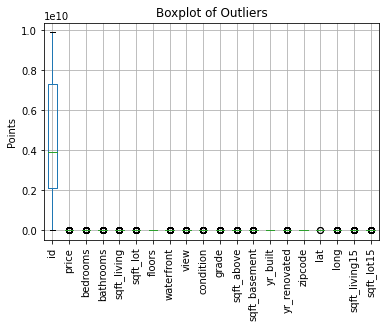

In [15]:
# let's check for outliers in the dataset using boxplot and give it a title and label

# let's create a function to plot the boxplot
def plot_boxplot(data,title,label):
    data.boxplot()
    plt.title(title)
    plt.xticks(rotation=90)
    plt.ylabel('Points')
    plt.show()

plot_boxplot(prices, 'Boxplot of Outliers', 'Points')

No outliers seem to be present in this dataset

#### Colinearity Test

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = prices.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(prices.values, i)
                          for i in range(len(prices.columns))]
  
print(vif_data)

/Users/la/Library/Python/3.8/lib/python/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


          feature       VIF
0              id  3.632659
1           price  3.330835
2        bedrooms  1.673248
3       bathrooms  3.375022
4     sqft_living       inf
5        sqft_lot  2.104736
6          floors  1.951202
7      waterfront  1.266535
8            view  1.460071
9       condition  1.228050
10          grade  3.706482
11     sqft_above       inf
12  sqft_basement       inf
13       yr_built  2.268879
14   yr_renovated  1.146372
15        zipcode  0.505574
16            lat  1.351917
17           long  1.832974
18  sqft_living15  2.889117
19     sqft_lot15  2.145441


Our values have a low VIF score hence showing that there is low corelation between the variables in the dataset

#### Descriptive Tests

In [17]:
# Displaying the descriptive statistics
# ---

prices.describe(include = 'all')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Regression Analysis

##### Preparation of Data

In [26]:
prices.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [56]:
# Getting our attributes and labels
# ---
#
X = prices[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]
y = prices['price']

#### Residual Plot


 residual Mean: 4626.5218534608775


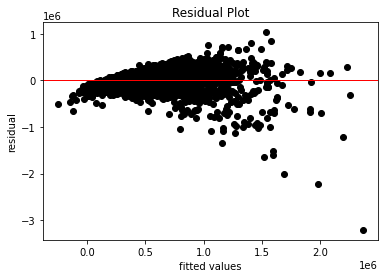

In [57]:
residual_check(prices)

Here we see that the residuals are all plotted close to the mean hence showing the appropriatness of this dataset to run the test and regresssion.

There are some outliers but are minimal

#### heteroskedasticity

In [58]:
heteroskedasticity(prices)

inf
the variances are homogeneous!


The Variables are Homogenous hence appropriate for a regression Test

##### R2 Coeffecient

In [59]:
model = LinearRegression()
model.fit(X, y)

yhat = model.predict(X)
SS_Residual = sum((y-yhat)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print (r_squared, adjusted_r_squared)

0.6997525539851861 0.6995022782591387


The variance in this model is explained by over 70% thus showing how appropriate it is to run the analysis

The adjusted R2 shows a value of R2 which is adequate for a reliable description of the dataset

#### 1. Mutiple Linear Regression


                 Coefficient
bedrooms       -34700.723276
bathrooms       39453.777987
sqft_living       112.667741
sqft_lot            0.175770
floors           7422.747673
waterfront     605764.113766
view            52800.675583
condition       26193.691361
grade           93684.336063
sqft_above         72.833023
sqft_basement      39.834718
yr_built        -2609.264147
yr_renovated       20.121682
zipcode          -567.605311
lat            604949.838451
long          -222616.017356
sqft_living15      24.242701
sqft_lot15         -0.467518

          Actual     Predicted
17384   297000.0  3.783754e+05
722    1580000.0  1.540515e+06
2680    562100.0  5.445618e+05
18754   631500.0  5.779767e+05
14554   780000.0  9.803160e+05
...          ...           ...
5427    844000.0  9.661871e+05
16547   335500.0  4.614823e+05
4585    369950.0  3.597607e+05
17762   300000.0  2.068983e+05
16323   575950.0  4.336015e+05

[4323 rows x 2 columns]

Mean Absolute Error: 122292.14383822103

Mean Squa

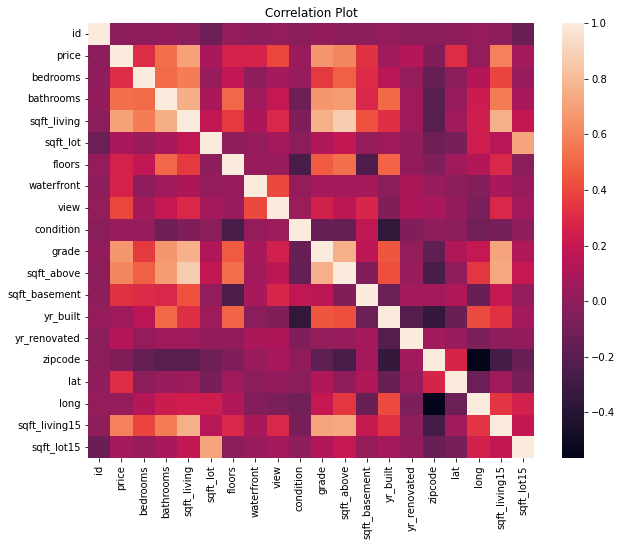

In [190]:

mutiple_line(prices)

The output gives us a couple of insights:

- The Regression Coefficients show how much change or effect on the dependent value there will be if it increases by a range of 1
- The actual and Predicted values look similar thus explains that the model is adequately explained
- The grade of the building and whether it is a waterfront property is one of the biggest influences to the final price of the property
- The RMSE value of 190594.90222467648 is less than 10% of the mean of the dependant value hence showing that the model is reliable

Important Metrics:

- Mean Absolute Error: 122292.14383822103

- Mean Squared Error: 36326416754.03399

- Root Mean Squared Error: 190594.90222467648


2. Quantile Regression

In [94]:
quantile(prices)

/Users/la/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


Mean squared error: 40518022074.28
Variance score: 0.70
                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.4728
Model:                       QuantReg   Bandwidth:                   1.946e+04
Method:                 Least Squares   Sparsity:                    2.628e+05
Date:                Fri, 22 Apr 2022   No. Observations:                21613
Time:                        16:20:09   Df Residuals:                    21595
                                        Df Model:                           17
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -140.8744      4.144    -33.996      0.000    -148.997    -132.752
X[0]       -2.143e+04   1233.018    -17.383      0.000   -2.39e+04    -1.9e+04
X[1]        2.885e+04   2124.164     13.583      0.000    2.47e+04     3.3e

/Users/la/Library/Python/3.8/lib/python/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


Insights from this output:
The Mean of the Model is 5.401822e+05 which larger than the MSE hence proving that the model is ok to be used for prediction.
Mean squared error: 40518022074.28

The variance also is above 70% which is reliable.
Variance score: 0.70


The pseudo R2 also shows a reliable figure for the model t be used.
Pseudo R-squared:               0.4728

The coefficient too shows the line of best fit and how the model is affected in the media, 1st and 3rd quartile range.

#### 3. Ridge Regression

In [128]:
ridge(prices)

The MSE for Base Model: 40518022074.275925


The base model gives an output of 40518022074.275925 which establishes a figure I will use to test the reliability of the model

In [129]:
     # Creating the Ridge Model
regression = LinearRegression()
regression.fit(X,y)
first_model = (mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print("The MSE for Base Model:", first_model)
ridge = Ridge(normalize=True)

search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

The MSE for Base Model: 40518022074.275925


/Users/la/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/Users/la/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous

41016657649.82225

The figure after fitting the ridge regression model gives an output of 41016657649.82225 which is worse than the base model MSE of 40518022074.275925

In [119]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

40524344765.439


/Users/la/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


The model however brings back an almost similar model figure of 40524344765.439 after fitting the Ridge Model hence proving that the ridge model is reliable at explaining and proving the model

In [121]:
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,prices.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'id': -35797.78526878027,
 'price': 41166.76100968799,
 'bedrooms': 110.51388750604916,
 'bathrooms': 0.12840424994483035,
 'sqft_living': 6695.157538716981,
 'sqft_lot': 583016.9475137593,
 'floors': 52934.07499962661,
 'waterfront': 26412.954334727685,
 'view': 95985.79230523002,
 'condition': 70.82712642204363,
 'grade': 39.68676095797481,
 'sqft_above': -2622.410499457613,
 'sqft_basement': 19.824180497913297,
 'yr_built': -582.5716677591586,
 'yr_renovated': 602825.2080907875,
 'zipcode': -214960.62365184783,
 'lat': 21.67584906828925,
 'long': -0.3824610304036469}

The output above gives coefficients for the model and how those effect the model and price of houses

#### 4. Lasso Regression


lasso score: 0.6997525517115606

lasso MSE: 40518022381.09862

lasso coef: [-3.57967295e+04  4.11634202e+04  2.85032232e+02  1.28366433e-01
  6.69413092e+03  5.82865467e+05  5.29391889e+04  2.64095267e+04
  9.59884515e+04 -1.03690658e+02 -1.34826318e+02 -2.62253879e+03
  1.98251341e+01 -5.82432859e+02  6.02760439e+05 -2.14871152e+05
  2.16729611e+01 -3.82510071e-01]

lasso best parameters: {'alpha': 21.0}

lasso score: 0.7097090163878486

linear score: 0.7097371661736279

lasso MSE: 41211703110.60994

linear MSE: 41207706773.556244

lasso best estimator coef: [-3.69884742e+04  3.62275459e+04  2.84236867e+02  1.41883588e-01
  1.13651350e+04  5.50535029e+05  5.18910691e+04  2.90625912e+04
  9.62675194e+04 -1.03477736e+02 -1.35504662e+02 -2.62472207e+03
  1.75862943e+01 -5.85090613e+02  6.01343447e+05 -2.15440293e+05
  2.44235201e+01 -3.60147101e-01]

linear coef: [-3.70140238e+04  3.63014673e+04  1.09794156e+02  1.42623119e-01
  1.13874494e+04  5.53581104e+05  5.17853823e+04  2.91315400

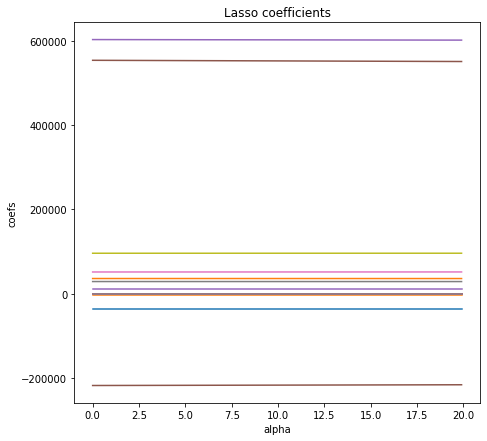

In [145]:
lasso(prices)

5. Elastic Ridge Regression

In [182]:
elastic(prices)

The MSE for Base Model: 40518022074.275925
The MSE for the Second Model: 79376555016.66553


In [170]:
# Creating our linear regression model for the purpose of comparison
# 
from pydataset import data

regression=LinearRegression()
regression.fit(X,y)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model) 

40518022074.275925


In [171]:
# Below are the coefficients of this first model. We use a for loop to go through 
# the model and the zip function to combine the two columns.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bedrooms': -35797.78526878027,
 'bathrooms': 41166.76100968799,
 'sqft_living': 110.51388750604916,
 'sqft_lot': 0.12840424994483035,
 'floors': 6695.157538716981,
 'waterfront': 583016.9475137593,
 'view': 52934.07499962661,
 'condition': 26412.954334727685,
 'grade': 95985.79230523002,
 'sqft_above': 70.82712642204363,
 'sqft_basement': 39.68676095797481,
 'yr_built': -2622.410499457613,
 'yr_renovated': 19.824180497913297,
 'zipcode': -582.5716677591586,
 'lat': 602825.2080907875,
 'long': -214960.62365184783,
 'sqft_living15': 21.67584906828925,
 'sqft_lot15': -0.3824610304036469}

In [172]:
# Elastic Net Model
# Elastic net, just like ridge and lasso regression, requires normalize data. 
# This argument  is set inside the ElasticNet function. 
# The second thing we need to do is create our grid.
# 
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [173]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X,y)
search.best_params_
abs(search.best_score_)

41058369186.64148

In [175]:
elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.75)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_model)

79376555016.66553


In [176]:
# Below are the coefficients
# 
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline


{'bedrooms': 9155.504009716382,
 'bathrooms': 23091.814427233778,
 'sqft_living': 28.799709870733352,
 'sqft_lot': 0.058884694865293664,
 'floors': 14344.85611049671,
 'waterfront': 143890.34582180186,
 'view': 21942.804290075466,
 'condition': 5771.699965611121,
 'grade': 22210.389114051002,
 'sqft_above': 26.88253093636235,
 'sqft_basement': 29.913482419991606,
 'yr_built': -116.48434589869713,
 'yr_renovated': 14.761443494182139,
 'zipcode': -5.75846185452919,
 'lat': 117967.60514689352,
 'long': -19353.74153969671,
 'sqft_living15': 31.194117802574013,
 'sqft_lot15': 0.06329940772824336}

#### CONCLUSION

The several Regression Models seem to show one consistent result:
the base model MSE and the MSE after running the various regression models prove the reliability and similarity of all the results being delivered.

The Variance explained too is consistent hence proving that the model is reliable.

Two factors do stand out as biggest effects to the price of the houses:
1. waterfront : Whether the property has a waterfront feature or not
2. bedrooms : Number of bedrooms
3. bathrooms : Number of bathroooms

The values that did give negative effect to the price of the properties were:
1. Zip code : Location/ Address of the houses
2. Year Built

#### Challenge Result

I would add more data in the analysis e.g a Time Factor then run a time series analysis comparing the results over time thus evaluating the insights over time for a chance to check the difference over time